In [1]:
library(pacman)
p_load(lubridate, AUC, tidyverse,magrittr, dplyr, tidyr,rlist,dummy , e1071, ROSE , rotationForest, xgboost, Boruta, varSelRF)

also installing the dependency 'jsonlite'

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6/PACKAGES'"


  There is a binary version available but the source version is later:
         binary source needs_compilation
jsonlite  1.7.2  1.8.0              TRUE

  Binaries will be installed
package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\jordy\anaconda3\envs\R2\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\jordy\anaconda3\envs\R2\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jordy\AppData\Local\Temp\RtmpU3xEIk\downloaded_packages



tidyverse installed
Warning message:
"package 'tidyverse' was built under R version 3.6.3"Warning message in p_load(lubridate, AUC, tidyverse, magrittr, dplyr, tidyr, rlist, :
"Failed to install/load:
tidyverse"

In [2]:
p_load(caret)

p_load(FNN)

p_load(randomForest)

options(repr.matrix.max.cols=1000, repr.matrix.max.rows=1000)

In [3]:
p_load(ranger)

In [4]:
p_load(ada)
p_load(remotes)

# Building basetable

In [5]:
table = (read.csv("Data//Mountain_races_final2.csv", sep = ";"))
head(table)

table_train = table[table$Year<=2017,]

table_val = table[(table$Year>2017)&(table$Year<=2019) ,]

table_trainandval = table[table$Year<=2019,]

table_test = table[table$Year>2019,]

Pos,Rider,Team,Time,Rider_ID,Rider_Country,Team_ID,Year,Stage,UCI,ID,Stage.Type,Race,ACCELERATION,ATTACK,Birthday,COBBLES,CONSTANT,DOWNHILL,ENDURANCE,FLAT,Family.Name,Given.Name,HILL,MOUNTAIN,Match,Name,PROLOGUE,Popularity,RECUP,RESISTANCE,Region,SPRINT,Size,TT,Weight,fitness_i_handicap,fkIDcyclist_state,fkIDinjury,fkIDrace,fkIDstaff_physician,fkIDstaff_trainer,fkIDstate_roster,fkIDtga_skin,fkIDtraining_camp,fkIDtype_rider,gene_b_inshortlist,gene_b_nominated,gene_b_selected_in_roster,gene_b_will_retire,gene_f_popularity_max,gene_i_champion_bit,gene_i_date_last_breakaway,gene_i_date_last_punchers,gene_i_day_progression,gene_i_dossard,gene_i_year_progression,gene_ilist_fkIDfavorite_races,gene_sz_firstlastname,gene_sz_soundname,limit_i_acceleration,limit_i_baroudeur,limit_i_cobble,limit_i_downhilling,limit_i_endurance,limit_i_hill,limit_i_mountain,limit_i_plain,limit_i_prologue,limit_i_recuperation,limit_i_resistance,limit_i_sprint,limit_i_timetrial,prerace_i_cyclist,race_b_withdrawal,value_i_potentiel,value_i_rank_voted
1,amador andrey,Movistar Team,05:33:36,745,CRC,5,2012,14,NA,432,Mountain,Giro,66,63,19860829,53,,65,65,65,Amador Bikkazakova,Andrey,68,69,NA,A.Amador Bikkazakova,68,21,68,65,6101,60,180,68,73,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,A.Amador Bikkazakova,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
2,barta jan,Team NetApp,+ 00,990,CZE,57,2012,14,NA,2280,Mountain,Giro,66,72,19841207,58,,67,64,68,Bárta,Jan,66,63,NA,J.Bárta,67,11,64,67,3301,61,184,68,73,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,J.Bárta,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
3,de marchi alessandro,Androni Giocattoli - Venezuela,+ 02,3103,ITA,23,2012,14,NA,2400,Mountain,Giro,60,64,19860519,53,,63,65,65,De Marchi,Alessandro,65,63,NA,A.De Marchi,64,7,62,64,201,61,181,64,68,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,A.De Marchi,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
4,hesjedal ryder,Garmin - Sharp,+ 20,52,CAN,10,2012,14,NA,376,Mountain,Giro,67,69,19801209,66,,76,75,72,Hesjedal,Ryder,78,77,NA,R.Hesjedal,72,59,77,75,2201,58,188,71,72,0,3,0,0,0,0,0,83,0,0,0,0,0,0,0,1,0,0,0,0,0,,R.Hesjedal,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
5,tiralongo paolo,Astana Pro Team,+ 46,359,ITA,25,2012,14,NA,506,Mountain,Giro,66,72,19770708,52,,64,70,66,Tiralongo,Paolo,72,74,NA,P.Tiralongo,66,36,75,72,219,61,169,65,69,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,P.Tiralongo,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
6,uran rigoberto,Sky ProCycling,+ 46,117,COL,44,2012,14,NA,566,Mountain,Giro,76,75,19870126,52,,66,71,67,Urán Urán,Rigoberto,76,75,NA,R.Urán Urán,70,45,71,73,1101,64,173,70,62,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,R.Urán Urán,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0


In [6]:
basetable_train = table_train %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

basetable_val = table_val %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

basetable_test = table_test %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

basetable = table_trainandval %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.


In [7]:
basetable_train = (basetable_train)%>% drop_na()
basetable_val = (basetable_val)%>% drop_na()
basetable_test = (basetable_test)%>% drop_na()
basetable = (basetable)%>% drop_na()

#Training set
basetable_train$Top10 = as.factor(ifelse(basetable_train$best_position <=10, 1,0))
basetable_train$Top5 = as.factor(ifelse(basetable_train$best_position <=5, 1,0))
basetable_train$Top4 = as.factor(ifelse(basetable_train$best_position <=4, 1,0))
basetable_train$Top3 = as.factor(ifelse(basetable_train$best_position <=3, 1,0))
basetable_train$Top2 = as.factor(ifelse(basetable_train$best_position <=2, 1,0))

table(basetable_train$Top5)

basetable_train$minutes_from_top = NULL
basetable_train$best_position = NULL
basetable_train$Team = NULL
basetable_train$Year = NULL
basetable_train$Stage = NULL
basetable_train$Team_ID = NULL
basetable_train$Race= NULL

#Validation set
basetable_val$Top10 = as.factor(ifelse(basetable_val$best_position <=10, 1,0))
basetable_val$Top5 = as.factor(ifelse(basetable_val$best_position <=5, 1,0))
basetable_val$Top4 = as.factor(ifelse(basetable_val$best_position <=4, 1,0))
basetable_val$Top3 = as.factor(ifelse(basetable_val$best_position <=3, 1,0))
basetable_val$Top2 = as.factor(ifelse(basetable_val$best_position <=2, 1,0))

table(basetable_val$Top5)


basetable_val$minutes_from_top = NULL
basetable_val$best_position = NULL
basetable_val$Team = NULL
basetable_val$Year = NULL
basetable_val$Stage = NULL
basetable_val$Team_ID = NULL
basetable_val$Race= NULL

#Test set
basetable_test$Top10 = as.factor(ifelse(basetable_test$best_position <=10, 1,0))
basetable_test$Top5 = as.factor(ifelse(basetable_test$best_position <=5, 1,0))
basetable_test$Top4 = as.factor(ifelse(basetable_test$best_position <=4, 1,0))
basetable_test$Top3 = as.factor(ifelse(basetable_test$best_position <=3, 1,0))
basetable_test$Top2 = as.factor(ifelse(basetable_test$best_position <=2, 1,0))

table(basetable_test$Top5)

basetable_test$minutes_from_top = NULL
basetable_test$best_position = NULL
basetable_test$Team = NULL
basetable_test$Year = NULL
basetable_test$Stage = NULL
basetable_test$Team_ID = NULL
basetable_test$Race= NULL

basetable$Top10 = as.factor(ifelse(basetable$best_position <=10, 1,0))
basetable$Top5 = as.factor(ifelse(basetable$best_position <=5, 1,0))
basetable$Top4 = as.factor(ifelse(basetable$best_position <=4, 1,0))
basetable$Top3 = as.factor(ifelse(basetable$best_position <=3, 1,0))
basetable$Top2 = as.factor(ifelse(basetable$best_position <=2, 1,0))

table(basetable$Top5)

basetable$minutes_from_top = NULL
basetable$best_position = NULL
basetable$Team = NULL
basetable$Year = NULL
basetable$Stage = NULL
basetable$Team_ID = NULL
basetable$Race= NULL

table_train <- basetable_train
table_test<- basetable_test
table_val <- basetable_val
table_trainval = basetable


  0   1 
125 179 


 0  1 
58 76 


 0  1 
47 69 


  0   1 
183 255 

# Feature Selection

## Variable selection: Boruta & varSelRF

In [11]:
#Preparing the train and validation tables
table_train5 <- table_train
table_val5 <- table_val
table_test5 <- table_test

table_train5$Top10 <- NULL
table_train5$Top4 <- NULL
table_train5$Top3 <- NULL
table_train5$Top2 <- NULL

table_val5$Top10 <- NULL
table_val5$Top4 <- NULL
table_val5$Top3 <- NULL
table_val5$Top2 <- NULL

table_test5$Top10 <- NULL
table_test5$Top4 <- NULL
table_test5$Top3 <- NULL
table_test5$Top2 <- NULL

In [12]:
head(table_train5)

flat_mean,mountain_mean,downhill_mean,cobbles_mean,tt_mean,prologue_mean,sprint_mean,acceleration_mean,endurance_mean,resistance_mean,recup_mean,hill_mean,attack_mean,flat_max,mountain_max,downhill_max,cobbles_max,tt_max,prologue_max,sprint_max,acceleration_max,endurance_max,resistance_max,recup_max,hill_max,attack_max,flat_min,mountain_min,downhill_min,cobbles_min,tt_min,prologue_min,sprint_min,acceleration_min,endurance_min,resistance_min,recup_min,hill_min,attack_min,Top5
66,69,68,57,63,64,63,68,66,67,68,68,68,71,78,78,61,68,69,75,74,72,74,75,75,73,64,58,61,54,58,61,56,61,63,64,63,65,61,0
66,70,66,55,64,64,64,69,67,69,67,70,70,70,79,70,68,68,70,75,75,69,74,72,74,80,64,60,63,51,60,60,56,60,64,64,62,65,63,1
68,70,65,57,67,67,62,68,68,69,69,71,69,74,78,70,68,76,76,72,76,74,76,76,78,72,63,62,62,52,58,61,56,63,65,64,63,67,62,1
70,67,67,60,66,68,63,69,68,69,67,70,72,79,75,73,80,77,76,73,73,77,74,75,75,78,65,59,63,53,58,59,56,62,66,64,62,64,64,0
66,63,64,55,60,61,64,66,65,65,64,67,68,72,75,71,59,63,65,76,77,70,72,71,73,73,63,56,60,53,58,58,58,61,62,61,60,62,63,1
65,68,66,55,61,62,59,64,66,66,66,68,69,69,76,69,57,67,68,63,70,72,73,73,74,82,62,56,62,53,57,58,55,61,62,61,59,62,62,1


In [13]:
#Variable selection: Boruta
rf_boruta <- Boruta(table_train5[, !names(table_train5) %in% c("Top5")], table_train5$Top5, doTrace = 0, maxRuns = 500)

In [14]:
varsel_boruta <- names(rf_boruta$finalDecision[rf_boruta$finalDecision == "Confirmed"])


##Variable selection :varSelRF
rf_vsrf <- varSelRF(table_train5[, !names(table_train5) %in% c("Top5")], table_train5$Top5, vars.drop.frac = 0.15,  ntree = 350, ntreeIterat = 100)
varsel_vsrf <- rf_vsrf$selected.vars

In [15]:
varsel_boruta

[1] "mountain_mean"   "cobbles_mean"    "tt_mean"         "resistance_mean"
 [5] "hill_mean"       "mountain_max"    "tt_max"          "recup_max"      
 [9] "hill_max"        "mountain_min"

In all models boruta variables perform better

# Prediction if finish in the top 5

In [34]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

val <- basetable_val
yVAL <- val$Top5
val$Top10 = NULL
val$Top5 = NULL
val$Top4 = NULL
val$Top3 = NULL
val$Top2 = NULL

In [35]:
#Boruto performs better
train = train[varsel_boruta]
val = val[varsel_boruta]

In [36]:
ncol(train)

[1] 9

## Ranger

### Tuning

In [37]:
# hyperparameter grid search
hyper_grid <- expand.grid(
  num_trees = c(1000),
  mtry       = seq(1, ncol(train), by = 1),
  node_size  = seq(1, 15, by = 2),
  sampe_size = c(.55, .632, .70,0.75,.80) 
)

In [38]:
for(i in 1:nrow(hyper_grid)) {
  
  # train model
  model <- ranger(
    x               = train, 
    y               = yTRAIN, 
    num.trees       = hyper_grid$num_trees[i],
    mtry            = hyper_grid$mtry[i],
    min.node.size   = hyper_grid$node_size[i],
    sample.fraction = hyper_grid$sampe_size[i],
    probability     = TRUE,
    seed            = 123
  )
  predictions =  predict(model,val)$predictions[,2]
  auc = AUC::auc(roc(predictions,factor(yVAL)))
  hyper_grid$AUC[i] <- auc
}

In [50]:
hyper_grid %>% 
  dplyr::arrange(AUC) %>%
  tail(5)


,num_trees,mtry,node_size,sampe_size,AUC
356,1000,1,7,0.800,0.6960073
357,1000,1,5,0.800,0.6966878
358,1000,1,3,0.632,0.6966878
359,1000,1,3,0.800,0.6975953
360,1000,1,5,0.550,0.6982759


### Validation

In [41]:
#No tuning
model <- ranger(x=train, y = yTRAIN, num.trees = 1000, probability = TRUE, seed = 123)
predictions =  predict(model,val)$predictions[,2]
AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.6826225

In [42]:
#With tuning
model <- ranger(x=train, y = yTRAIN, num.trees = 1000, mtry = 1, min.node.size = 5, sample.fraction = 0.550, probability = TRUE, seed = 123)
predictions =  predict(model,val)$predictions[,2]
auc = AUC::auc(roc(predictions,factor(yVAL)))
AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.6982759

In [43]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yVAL

In [44]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 29 20
         1 29 56

[1] "AUC:  0.698275862068966"

[1] "Accuracy:  0.634328358208955"

[1] "Recall:  0.736842105263158"

[1] "Precision:  0.658823529411765"

### Test

In [45]:
set.seed(123)
train <- basetable
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

test <- basetable_test
yTEST <- test$Top5
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL
test$Top2 = NULL

In [46]:
train = train[varsel_boruta]
test = test[varsel_boruta]

In [47]:
model <- ranger(x=train, y = yTRAIN, num.trees = 1000, mtry = 1, min.node.size = 5, sample.fraction = 0.550, probability = TRUE, seed = 123)
predictions =  predict(model,test)$predictions[,2]
auc = AUC::auc(roc(predictions,factor(yTEST)))
AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.7702744

In [48]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

In [49]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 22 10
         1 25 59

[1] "AUC:  0.77027443724946"

[1] "Accuracy:  0.698275862068966"

[1] "Recall:  0.855072463768116"

[1] "Precision:  0.702380952380952"

## Random Forest

In [51]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

val <- basetable_val
yVAL <- val$Top5
val$Top10 = NULL
val$Top5 = NULL
val$Top4 = NULL
val$Top3 = NULL
val$Top2 = NULL

In [52]:
train = train[varsel_boruta]
val = val[varsel_boruta]

### Tuning

In [53]:
# hyperparameter grid search
hyper_grid <- expand.grid(
num_trees = c(1000),
  mtry       = seq(1, ncol(train), by = 1),
  node_size  = seq(1, 15, by = 3),
  sampe_size = c(.55, .632, .70,0.75,.80) 
)

In [54]:
for(i in 1:nrow(hyper_grid)) {
  set.seed(123)
  # train model
  model <- randomForest(
    x               = train, 
    y               = yTRAIN, 
    ntree           = hyper_grid$num_trees[i],
    mtry            = hyper_grid$mtry[i],
    node_size       = hyper_grid$node_size[i],
    sample_frac     = hyper_grid$sampe_size[i]
  )
  predictions <- predict(model, val, type = "prob")[, 2]
  auc = AUC::auc(roc(predictions,factor(yVAL)))
  hyper_grid$AUC[i] <- auc
}

In [60]:
hyper_grid %>% 
  dplyr::arrange(AUC) %>%
  tail(5)


,num_trees,mtry,node_size,sampe_size,AUC
221,1000,2,1,0.8,0.697255
222,1000,2,4,0.8,0.697255
223,1000,2,7,0.8,0.697255
224,1000,2,10,0.8,0.697255
225,1000,2,13,0.8,0.697255


### Validation

In [61]:
#No Tuning
set.seed(123)
rFmodel <- randomForest(x=train, y = yTRAIN, ntree = 1000)
predictions <- predict(rFmodel, val, type = "prob")[, 2]

AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.689882

In [62]:
#Tuning
set.seed(123)
rFmodel <- randomForest(x=train, y = yTRAIN, ntree = 1000,mtry=2)
predictions <- predict(rFmodel, val, type = "prob")[, 2]

AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.697255

In [63]:
auc = AUC::auc(roc(predictions,factor(yVAL)))

In [64]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yVAL

In [65]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 30 19
         1 28 57

[1] "AUC:  0.69725499092559"

[1] "Accuracy:  0.649253731343284"

[1] "Recall:  0.75"

[1] "Precision:  0.670588235294118"

### Test

In [68]:
set.seed(123)
#Basetable is the combination of the validation and training set
train <- basetable
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

test <- basetable_test
yTEST <- test$Top5
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL
test$Top2 = NULL

In [69]:
train = train[varsel_boruta]
test = test[varsel_boruta]

In [70]:
set.seed(123)
rFmodel <- randomForest(x=train, y = yTRAIN, ntree = 1000,mtry=2)
predictions <- predict(rFmodel, test, type = "prob")[, 2]

auc = AUC::auc(roc(predictions,factor(yTEST)))
AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.7434474

In [71]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

In [72]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 23 12
         1 24 57

[1] "AUC:  0.743447425223558"

[1] "Accuracy:  0.689655172413793"

[1] "Recall:  0.826086956521739"

[1] "Precision:  0.703703703703704"

## XGBoost

In [27]:
#Preparing the train and validation tables
table_train5 <- table_train
table_val5 <- table_val
table_test5 <- table_test
table_trainval5 <- table_trainval

table_train5$Top10 <- NULL
table_train5$Top4 <- NULL
table_train5$Top3 <- NULL
table_train5$Top2 <- NULL

table_val5$Top10 <- NULL
table_val5$Top4 <- NULL
table_val5$Top3 <- NULL
table_val5$Top2 <- NULL

table_test5$Top10 <- NULL
table_test5$Top4 <- NULL
table_test5$Top3 <- NULL
table_test5$Top2 <- NULL

table_trainval5$Top10 <- NULL
table_trainval5$Top4 <- NULL
table_trainval5$Top3 <- NULL
table_trainval5$Top2 <- NULL

In [28]:
#new train en val set
y_train <- table_train5$Top5
train <- table_train5
train$Top5<- NULL

y_val <- table_val5$Top5
val <- table_val5
val$Top5 <-NULL

y_test <- table_test5$Top5
test <- table_test
table_test5$Top5 <- NULL

y_trainval <- table_trainval5$Top5
trainval <- table_trainval5
table_trainval5$Top5 <- NULL

In [29]:
train_fs <- train[varsel_boruta]
val_fs <- val[varsel_boruta]
test_fs <- test[varsel_boruta]
trainval_fs = trainval[varsel_boruta]

In [30]:
head(train_fs,n = 2)

mountain_mean,cobbles_mean,tt_mean,resistance_mean,hill_mean,mountain_max,tt_max,recup_max,hill_max,mountain_min
69,57,63,67,68,78,68,75,75,58
70,55,64,69,70,79,68,72,74,60


In [31]:
head(val_fs,n = 2)

mountain_mean,cobbles_mean,tt_mean,resistance_mean,hill_mean,mountain_max,tt_max,recup_max,hill_max,mountain_min
68,60,63,67,71,77,73,76,76,56
65,59,64,64,69,74,72,71,75,54


In [32]:
head(test_fs,n = 2)

mountain_mean,cobbles_mean,tt_mean,resistance_mean,hill_mean,mountain_max,tt_max,recup_max,hill_max,mountain_min
73,63,66,72,73,76,74,74,76,71
70,61,63,69,71,72,65,72,73,65


In [33]:
head(trainval_fs,n = 2)

mountain_mean,cobbles_mean,tt_mean,resistance_mean,hill_mean,mountain_max,tt_max,recup_max,hill_max,mountain_min
69,57,63,67,68,78,68,75,75,58
70,55,64,69,70,79,68,72,74,60


### Tuning

In [34]:
#preparing matrices
#convert all data to numeric format
trainxgb <- train_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
testxgb <- test_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
valxgb <- val_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
trainvalxgb = trainval_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)

In [35]:
dtrain <- xgb.DMatrix(data = as.matrix(trainxgb), label = as.numeric(as.character(y_train))) 
dval <- xgb.DMatrix(data = as.matrix(valxgb), label = as.numeric(as.character(y_val))) 
dtest <- xgb.DMatrix(data = as.matrix(testxgb))
dtrainval = xgb.DMatrix(data = as.matrix(trainvalxgb), label = as.numeric(as.character(y_trainval))) 

[1]	train-auc:0.901274	test-auc:0.684437 
[2]	train-auc:0.933296	test-auc:0.679333 
[3]	train-auc:0.936961	test-auc:0.675930 
[4]	train-auc:0.946190	test-auc:0.686139 
[5]	train-auc:0.945028	test-auc:0.688748 
[6]	train-auc:0.959374	test-auc:0.675250 
[7]	train-auc:0.959799	test-auc:0.670712 
[8]	train-auc:0.963240	test-auc:0.662999 
[9]	train-auc:0.964983	test-auc:0.663226 
[10]	train-auc:0.968425	test-auc:0.670939 
[11]	train-auc:0.971464	test-auc:0.670259 
[12]	train-auc:0.973944	test-auc:0.678312 
[13]	train-auc:0.977743	test-auc:0.681261 
[14]	train-auc:0.980201	test-auc:0.682396 
[15]	train-auc:0.981408	test-auc:0.679900 
[16]	train-auc:0.982391	test-auc:0.679900 
[17]	train-auc:0.983866	test-auc:0.677518 
[18]	train-auc:0.985341	test-auc:0.673888 
[19]	train-auc:0.986816	test-auc:0.670712 
[20]	train-auc:0.987620	test-auc:0.668217 


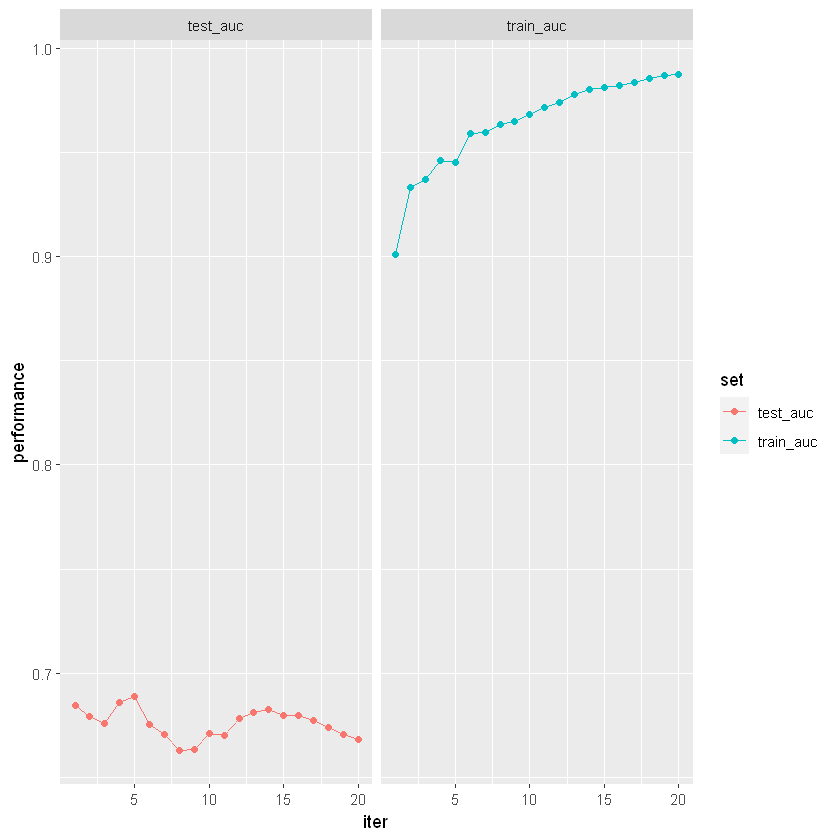

In [36]:
#plotting learning curve of the number of iterations
#Need to have watchlist and verbose turned on
watchlist <- list(train=dtrain, test=dval)
set.seed(123)
xgbModel_opt <- xgb.train(
    data = dtrain, 
    nrounds = 20,
    eta= 0.1,
    objective = "binary:logistic", 
    verbose = 2, 
    watchlist = watchlist,
    eval_metric = 'auc',
)

history <- xgbModel_opt$evaluation_log

history %>% pivot_longer(2:3, names_to = "set", values_to = "performance") %>% 
  ggplot(., aes(iter, performance, col = set))+
  geom_point()+ geom_line()+
  facet_wrap(~set)

In [39]:
opt_iter

[1] 5

### Validation

In [38]:
set.seed(123)
##Optimize nrounds BEST
opt_iter <- history$iter[which.max(history$test_auc)]

xgbModel_opt <- xgb.train(
    data          = dtrain, 
    nrounds       = opt_iter, 
    objective     = "binary:logistic",
    eta           = 0.1,
    verbose       = 2, 
    eval_metric   = 'auc'
)

predxgb <- predict(xgbModel_opt,dval)
auc <-AUC::auc(roc(predxgb,y_val))
AUC::auc(roc(predxgb,y_val))

[1] 0.6887477

In [118]:
res <-ifelse(predxgb>=0.5,1,0)
true_outcome <- y_val

confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 34 19
         1 24 57

[1] "AUC:  0.698729582577132"

[1] "Accuracy:  0.67910447761194"

[1] "Recall:  0.75"

[1] "Precision:  0.703703703703704"

### Test

In [40]:
set.seed(123)
##Optimize nrounds BEST
opt_iter <- history$iter[which.max(history$test_auc)]

xgbModel_opt <- xgb.train(
    data          = dtrainval, 
    nrounds       = 15, 
    objective     = "binary:logistic",
    eta           = 0.1,
    verbose       = 2, 
    eval_metric   = 'auc'
)

In [41]:
#Although a lower AUC the recall and precision i significantly better than both ranger and random forest
set.seed(123)
predxgb <- predict(xgbModel_opt,dtest)
auc <-AUC::auc(roc(predxgb,y_test))
res <-ifelse(predxgb>=0.5,1,0)
true_outcome <- y_test


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 27 26
         1 20 43

[1] "AUC:  0.661116250385446"

[1] "Accuracy:  0.603448275862069"

[1] "Recall:  0.623188405797101"

[1] "Precision:  0.682539682539683"

## LightGBM

In [34]:
#Preparing the train and validation tables
table_train5 <- table_train
table_val5 <- table_val
table_test5 <- table_test
table_trainval5 <- table_trainval

table_train5$Top10 <- NULL
table_train5$Top4 <- NULL
table_train5$Top3 <- NULL
table_train5$Top2 <- NULL

table_val5$Top10 <- NULL
table_val5$Top4 <- NULL
table_val5$Top3 <- NULL
table_val5$Top2 <- NULL

table_test5$Top10 <- NULL
table_test5$Top4 <- NULL
table_test5$Top3 <- NULL
table_test5$Top2 <- NULL

table_trainval5$Top10 <- NULL
table_trainval5$Top4 <- NULL
table_trainval5$Top3 <- NULL
table_trainval5$Top2 <- NULL

In [35]:
#new train en val set
y_train <- table_train5$Top5
train <- table_train5
train$Top5<- NULL

y_val <- table_val5$Top5
val <- table_val5
val$Top5 <-NULL

y_test <- table_test5$Top5
test <- table_test
table_test5$Top5 <- NULL

#Combining test and validationset together
y_trainval <- table_trainval5$Top5
trainval <- table_trainval5
trainval$Top5<- NULL

In [36]:
train_fs <- train[varsel_boruta]
val_fs <- val[varsel_boruta]
test_fs <- test[varsel_boruta]
trainval_fs = trainval[varsel_boruta]

### Tuning

In [ ]:
leaves <- c(2, 4, 6, 8)
nround <- c(2, 5, 10, 20, 50, 100, 200)
learning_rate <- c(0.01, 0.05, 0.1, 0.2, 0.5)

# create data frame of all possible combinations
params <- expand.grid(leaves, nround, learning_rate)
colnames(params) <- c("leaves", "nround", "learning_rate")

aucs <- vector()
for (row in 1:nrow(params)) {
  # set parameters
  par <- params[row, ]
  param_set <- list(num_leaves = par[, "leaves"],
                    learning_rate = par[,"learning_rate"],
                    objective = "binary", boosting = "gbdt",
                    num_iterations = par[, "nround"])
  # model
  lgbm_model <- lightgbm(data = as.matrix(train_fs),
                         params = param_set, label = as.numeric(as.character(y_train)),
                         verbose = -1)

  # predict
  pred <- predict(lgbm_model, as.matrix(val_fs))
  
  # evaluate
  aucs[row] <- AUC::auc(AUC::roc(pred, y_val))
}

In [ ]:
(optimal_paramsLGBM <- params[which.max(aucs), ])

### Build optimal model

In [ ]:
# Build the final model on the optimal parameters
final_param_set <- list(num_leaves = optimal_paramsLGBM[, "leaves"],
                        learning_rate = optimal_paramsLGBM[, "learning_rate"], objective = "binary",
                        boosting = "gbdt", num_iterations = optimal_paramsLGBM[,
                                                                               "nround"])

lgbm_model <- lightgbm(data = as.matrix(train_fs), params = final_param_set,
                       label = as.numeric(as.character(y_train)), verbose = -1)

### Validation

In [ ]:
# Predict
predlgbm <- predict(lgbm_model, as.matrix(val_fs))
# Evaluate
AUC::auc(AUC::roc(predlgbm, y_val))

### Test

In [ ]:
predlgbm <- predict(lgbm_model, as.matrix(test_fs))
auc <-AUC::auc(AUC::roc(predlgbm, y_test))

In [ ]:
res <-ifelse(predlgbm>=0.5,1,0)
true_outcome <- y_test


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)



# Rotation forest


In [170]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

val <- basetable_val
yVAL <- val$Top5
val$Top10 = NULL
val$Top5 = NULL
val$Top4 = NULL
val$Top3 = NULL
val$Top2 = NULL

In [128]:
#Boruto performs better
train = train[varsel_boruta]
val = val[varsel_boruta]

### Tuning

In [130]:
# hyperparameter grid search
hyper_grid <- expand.grid(
  L       = seq(1, 20, by = 1),
  K       = seq(1, round(ncol(train)/2), by = 1)
)

In [131]:
ncol(train)

[1] 9

In [132]:
for(i in 1:nrow(hyper_grid)) {
  set.seed(123)
  # train model
  RoFmodel <- rotationForest(
    x               = train, 
    y               = yTRAIN, 
    L               = hyper_grid$L[i],
    K               = hyper_grid$K[i],
  )
  predictions =  predict(RoFmodel, val)
  auc = AUC::auc(roc(predictions,factor(yVAL)))
  hyper_grid$AUC[i] <- auc
}

In [133]:
hyper_grid %>% 
  dplyr::arrange(AUC) %>%
  tail(5)


,L,K,AUC
76,11,2,0.7104129
77,9,2,0.7115472
78,12,2,0.7146098
79,13,2,0.7148367
80,10,2,0.7183530


### Validation

In [171]:
#No tuning
set.seed(123)
RoFmodel <- rotationForest(x=train, y = yTRAIN)
predictions =  predict(RoFmodel,val)
AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.7363575

In [172]:
#With tuning
set.seed(123)
RoFmodel <- rotationForest(x=train, y = yTRAIN, L=10, K=2)
predictions =  predict(RoFmodel, val)
auc = AUC::auc(roc(predictions,factor(yVAL)))
AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.6278913

In [136]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yVAL

In [137]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 33 19
         1 25 57

[1] "AUC:  0.718352994555354"

[1] "Accuracy:  0.671641791044776"

[1] "Recall:  0.75"

[1] "Precision:  0.695121951219512"

### Test

In [138]:
set.seed(123)
train <- basetable
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

test <- basetable_test
yTEST <- test$Top5
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL
test$Top2 = NULL

In [139]:
train = train[varsel_boruta]
test = test[varsel_boruta]

In [143]:
set.seed(123)
model <- rotationForest(x=train, y = yTRAIN, L=10, K=2)
predictions =  predict(model,test)
auc = AUC::auc(roc(predictions,factor(yTEST)))
AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.7584027

In [144]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

In [145]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 23  9
         1 24 60

[1] "AUC:  0.758402713536849"

[1] "Accuracy:  0.71551724137931"

[1] "Recall:  0.869565217391304"

[1] "Precision:  0.714285714285714"

# Catboost

In [159]:
train_pool <- catboost.load_pool(data = data.matrix(basetable_train[,-(40:44)]),label = as.numeric(as.character(basetable_train$Top5)))
val_pool <- catboost.load_pool(data = data.matrix(basetable_val[,-(40:44)]), label = as.numeric(as.character(basetable_val$Top5)))

ERROR: Error in catboost.load_pool(data = data.matrix(basetable_train[, -(40:44)]), : could not find function "catboost.load_pool"


In [ ]:
# parameter tuning with caret
fit_control <- trainControl(method = "cv",
                            number = 4,
                            classProbs = TRUE)

grid <- expand.grid(depth = c(4, 6, 8),
                    learning_rate = c(0.1,0.5,1),
                    iterations = 100,
                    l2_leaf_reg = c(0.001, 0.01, 0.1, 1),
                    rsm = 0.95,
                    border_count = 64)
report <- train(basetable_train[,-(40:44)], as.factor(make.names(basetable_train$Top5)),
                method = catboost.caret,
                logging_level = 'Verbose', preProc = NULL,
                tuneGrid = grid, trControl = fit_control)

print(report)
#extract best parameters
params <- list(loss_function = 'Logloss',
               iterations = 100, 
               depth = 8, 
               learning_rate = 0.1,
               l2_leaf_reg = 0.001, #L2 regularization 
               metric_period=10)

importance <- varImp(report, scale = FALSE)
print(importance)

In [ ]:
# train model
catboost_train <- catboost.train(train_pool,  NULL, params = params)

preds_cad_train <- catboost.predict(catboost_train, val_pool)

AUC::auc(AUC::roc(preds_cad_train,basetable_val$Top5)) # Validation set AUC

In [ ]:
# now for test set
big_pool <- catboost.load_pool(data = data.matrix(basetable[,-(40:44)]), 
                                 label = as.numeric(as.character(basetable$Top5)))
test_pool <- catboost.load_pool(data = data.matrix(basetable_test[,-(40:44)]), 
                               label = as.numeric(as.character(basetable_test$Top5)))

catboost_test <- catboost.train(big_pool,  NULL, params = params)

preds_cad_test <- catboost.predict(catboost_test, test_pool)

AUC::auc(AUC::roc(preds_cad_test,basetable_test$Top5)) # Test set AUC

In [ ]:
# check accuracy
res <-ifelse(preds_cad_test>=0.5,1,0)
true_outcome <- basetable_test$Top5


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
accuracy

# AdaBoost

In [ ]:
p_load(ada)
#Prepating the train and validation tables
table_train5 <- table_train
table_val5 <- table_val
table_test5 <- table_test
table_train5$Top10 <- NULL
table_train5$Top4 <- NULL
table_train5$Top3 <- NULL
table_train5$Top2 <- NULL
table_val5$Top10 <- NULL
table_val5$Top4 <- NULL
table_val5$Top3 <- NULL
table_val5$Top2 <- NULL
table_test5$Top10 <- NULL
table_test5$Top4 <- NULL
table_test5$Top3 <- NULL
table_test5$Top2 <- NULL

# Perform Boruta search
boruta_output <- Boruta(Top5 ~ ., data=na.omit(table_train5), doTrace=0) 
boruta_signif <- getSelectedAttributes(boruta_output, withTentative = TRUE)
print(boruta_signif) 

roughFixMod <- TentativeRoughFix(boruta_output)
boruta_signif <- getSelectedAttributes(roughFixMod)
print(boruta_signif)
imps <- attStats(roughFixMod)
imps2 = imps[imps$decision != 'Rejected', c('meanImp', 'decision')]
head(imps2[order(-imps2$meanImp), ])  # descending sort
plot(boruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance")  

#new train en val set
y_train <- table_train5$Top5
train <- table_train5
train$Top5<- NULL

y_val <- table_val5$Top5
val <- table_val5
val$Top5 <-NULL

y_test <- table_test5$Top5
test <- table_test
table_test5$Top5 <- NULL


train_fs <- train[boruta_signif]
val_fs <- val[boruta_signif]
test_fs <- test[boruta_signif]

In [ ]:

#preparing matrices
#convert all data to numeric format
trainxgb <- train_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
testxgb <- test_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
valxgb <- val_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)

dtrain <- xgb.DMatrix(data = as.matrix(trainxgb),
                      label = as.numeric(as.character(y_train))) 
dval <- xgb.DMatrix(data = as.matrix(valxgb), 
                    label = as.numeric(as.character(y_val))) 
dtest <- xgb.DMatrix(data = as.matrix(testxgb))


watchlist <- list(train=dtrain, test=dval)
adaModel_opt <- xgb.train(data = dtrain, 
                          nrounds = 20, 
                          eta=0.1,
                          objective = "binary:logistic", 
                          verbose = 2, 
                          watchlist = watchlist,
                          eval_metric = 'auc')

history <- adaModel_opt$evaluation_log

history %>% pivot_longer(2:3,names_to = "set", values_to = "performance") %>% 
  ggplot(., aes(iter, performance, col = set))+
  geom_point() + geom_line() + 
  facet_wrap(~set, )


opt_iter <- history$iter[which.max(history$test_auc)]
adaModel_opt <- xgb.train(data = dtrain, 
                          nrounds = opt_iter, 
                          eta=0.1,
                          objective = "binary:logistic", 
                          verbose = 2, 
                          eval_metric = 'auc')

ABmodel <- ada(y_train ~ . ,train_fs,iter=opt_iter)

predAB <- as.numeric(predict(ABmodel,val_fs,type="probs")[,2])
AUC::auc(roc(predAB,y_val))

predAB <- as.numeric(predict(ABmodel,test_fs,type="probs")[,2])
auc <-AUC::auc(roc(predAB,y_test))

In [ ]:

res <-ifelse(predAB>=0.5,1,0)
true_outcome <- y_test


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

# Heterogenous ensemble

In [ ]:

# adaboost & rotation
finalpredictions <- (auc_RoF/(auc_RoF + auc_ada)) * pred_RoF_test + (auc_ada/(auc_RoF + auc_ada)) * predAB

AUC::auc(AUC::roc(finalpredictions, basetable_test$Top5))

# accuracy
res <-ifelse(finalpredictions>=0.5,1,0)
true_outcome <- basetable_test$Top5


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
accuracy
